# Importing Needed Libraries¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot

# Reading the Dataset¶

In [2]:
df = pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')

artist: Name of the Artist.

song: Name of the Track.
duration_ms: Duration of the track in milliseconds.

explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.

year: Release Year of the track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

genre: Genre of the track.

# Exploring the Data¶

In [3]:
df.shape

(2000, 18)

In [4]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


**we don't have a null value**

In [7]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


**mean of Duration is 228748.124500
max of Duration is  113000.000000
min of Duration is 484146.000000**

In [8]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [9]:
df.duplicated().sum()

59

**There ara duplicated data**

# Data Cleaning

In [10]:
df.drop_duplicates(inplace=True)

**Drop the repated Data**

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [13]:
df.rename(columns={'artist':'Artist', 'song':'Track', 'duration_ms':'Duration_MS', 'explicit':'Explicit', 'year':'Year',
        'popularity':'Popularity',
       'danceability':'Danceability', 'energy':'Energy', 'key':'Key', 'loudness':'Loudness', 'mode':'Mode', 'speechiness':'Speechiness',
       'acousticness':'Acousticness', 'instrumentalness':'Instrumentalness', 'liveness':'Liveness', 'valence':'Valence', 'tempo':'Tempo',
       'genre':'Genre'},inplace=True)

**Edit the name of columns**

In [14]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Analysis and Visualization 

**How many songs we have from each year?**

In [15]:
song_year = df['Year'].value_counts().reset_index()
song_year

,Year,count
0,2012,113
1,2017,110
2,2001,106
3,2018,104
4,2010,103
5,2005,101
6,2014,100
7,2016,98
8,2011,96
9,2004,95


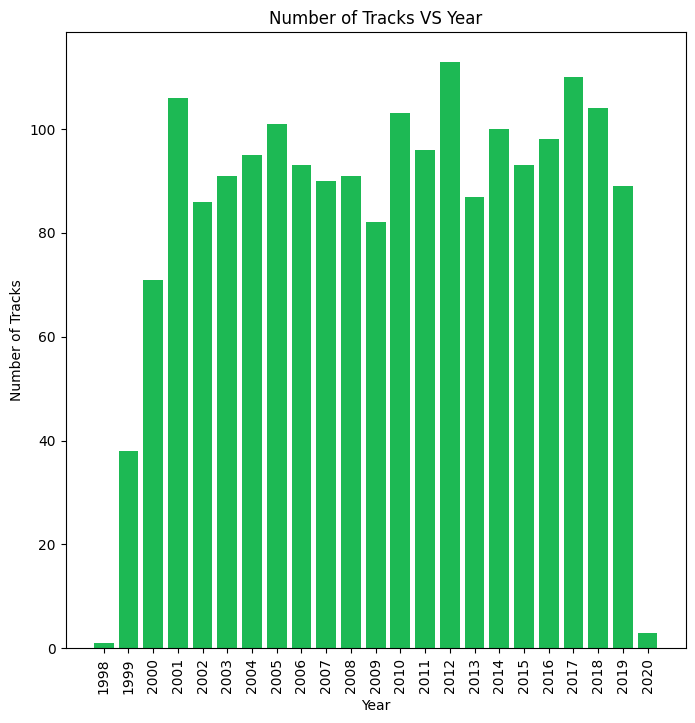

In [16]:
xticks=song_year['Year']
plt.figure(figsize=(8,8))
plt.bar(song_year['Year'],song_year['count'],color = '#1DB954',width=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks VS Year')
plt.xticks(xticks, xticks,rotation=90)
plt.show()

**this graph show the number of tracks make in the year**

In [17]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


**How many Tracks have Popularity Above 85?**

In [18]:
pop_track = df.groupby('Track')['Popularity'].value_counts().reset_index().sort_values(by='Popularity',ascending=False)
pop_track

,Track,Popularity,count
1575,Sweater Weather,89,1
96,Another Love,88,1
1867,Without Me,87,1
1766,Wait a Minute!,86,1
1932,lovely (with Khalid),86,1
...,...,...,...
1357,Romeo,0,1
847,Jealous - Remix,0,1
1344,Rock The Boat,0,1
857,Jumpman,0,1


In [19]:
Popularity_85 = df[df['Popularity'] >= 85]
Popularity_85

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
209,Eminem,'Till I Collapse,297786,True,2002,85,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.100,171.447,hip hop
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop


In [20]:
len(Popularity_85)

12

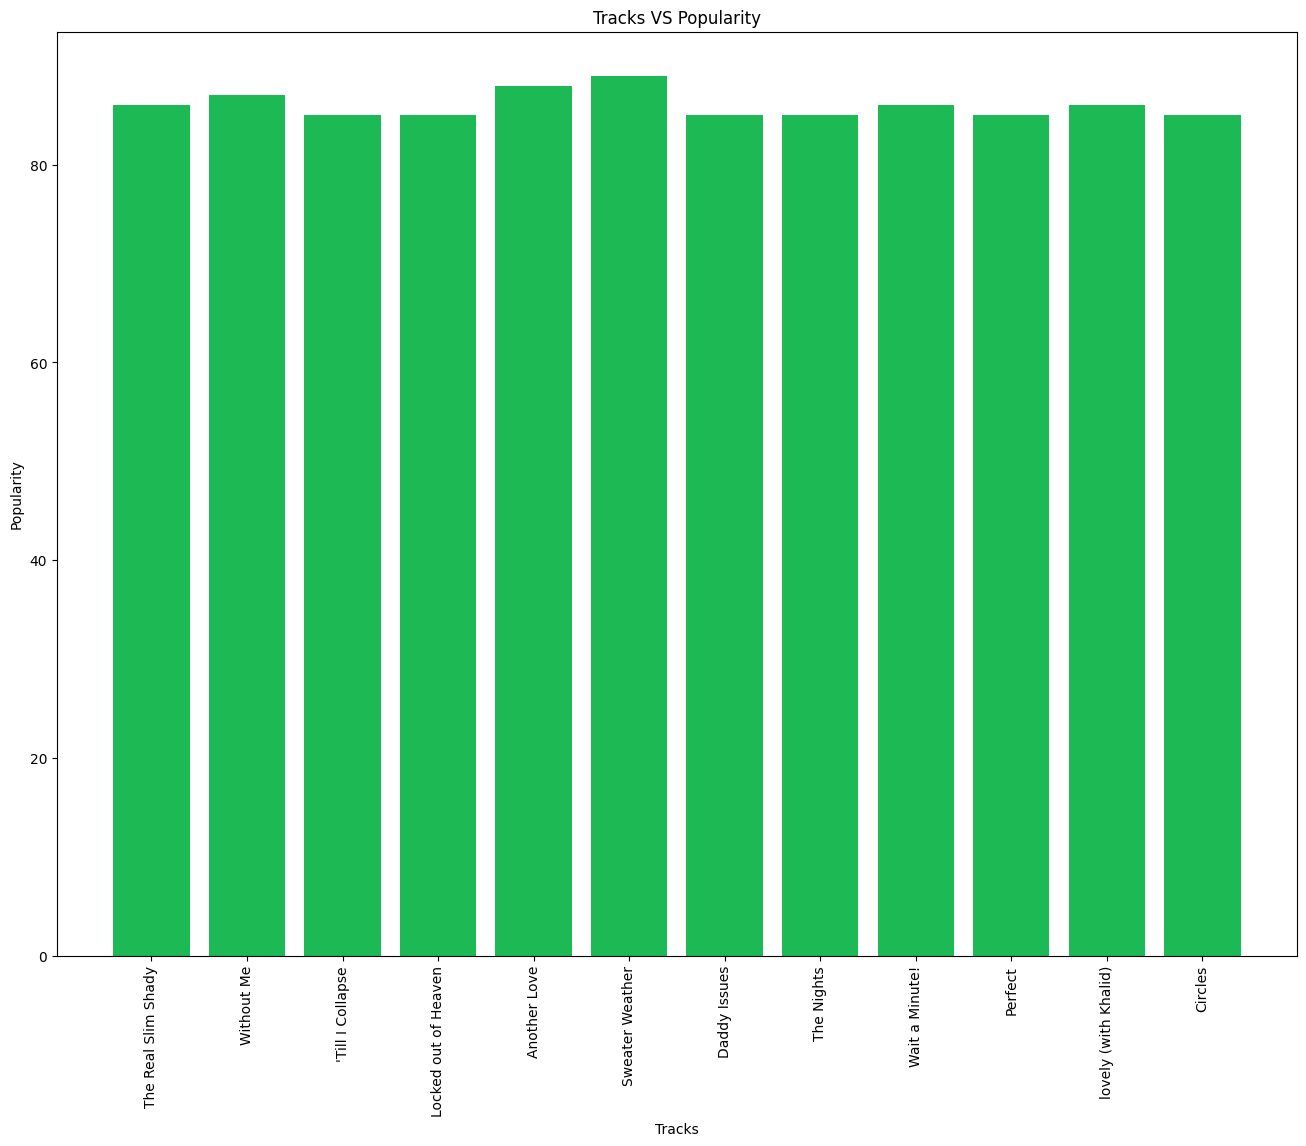

In [21]:
xticks=Popularity_85['Track']
plt.figure(figsize=(16,12))
plt.bar(Popularity_85['Track'],Popularity_85['Popularity'],color = '#1DB954',width=0.8)
plt.xlabel('Tracks')
plt.ylabel('Popularity')
plt.title('Tracks VS Popularity')
plt.xticks(xticks, xticks,rotation=90)
plt.show()

**Top 12 Tracks have Popularity Above 85**

<h2>Top 50 artist with another artist<h2>

In [22]:
all_artist = df['Artist'].value_counts().reset_index().sort_values(by='count',ascending = False)
all_artist

,Artist,count
0,Drake,23
1,Rihanna,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
...,...,...
494,Sting,1
493,Bomfunk MC's,1
492,Eiffel 65,1
491,Gesaffelstein,1


In [23]:
Top_50_artist = df['Artist'].value_counts().reset_index().sort_values(by='count',ascending = False).head(50)
Top_50_artist

,Artist,count
0,Drake,23
1,Rihanna,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Chris Brown,16
7,Katy Perry,16
8,Taylor Swift,16
9,Beyoncé,16


In [24]:
len(Top_50_artist)

50

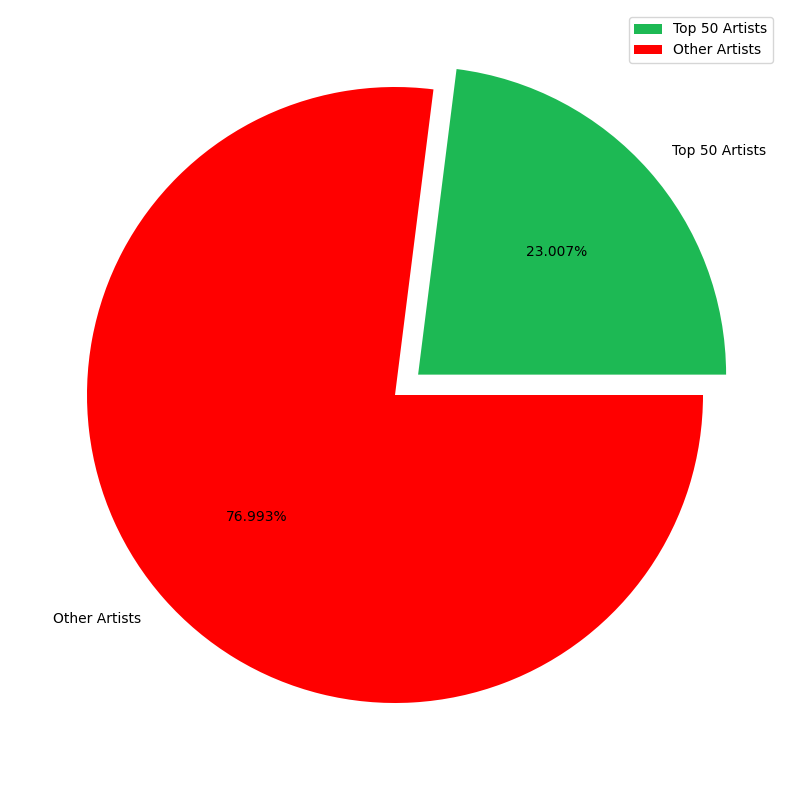

In [25]:
plt.figure(figsize=(10,10))
plt.pie([Top_50_artist['count'].sum(),all_artist['count'].sum()],labels = ['Top 50 Artists', 'Other Artists'],autopct='%1.3f%%',explode=[0.1,0],colors=['#1DB954','red'])
plt.legend()
plt.show()

**this pie show the number of top 50 artist and the other**

<h2>No. of artists with only 1 song VS artists with more than 1<h2>

In [26]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [27]:
artists = df['Artist'].value_counts()
artists

Artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Big Tymers         1
DJ Sammy           1
Cam’ron            1
Mumford & Sons     1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [28]:
artists_with_one_song = artists.loc[lambda x:x == 1]
# len(artists_with_one_song)

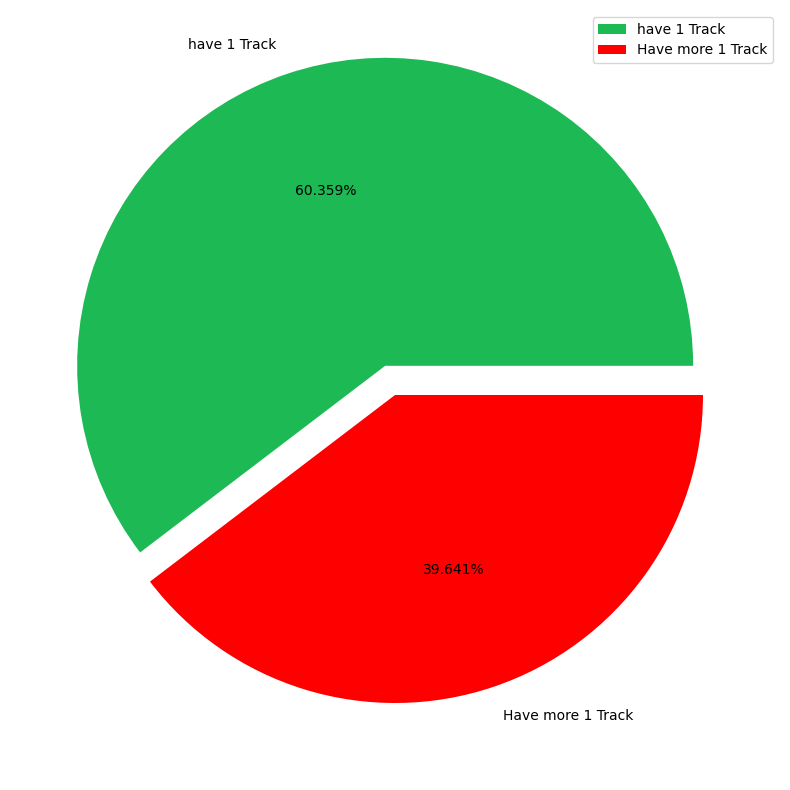

In [29]:
plt.figure(figsize=(10,10))
plt.pie([len(artists_with_one_song),len(all_artist)-len(artists_with_one_song)],labels = ['have 1 Track', 'Have more 1 Track'],autopct='%1.3f%%',explode=[0.1,0],colors=['#1DB954','red'])
plt.legend()
plt.show()

**this pie show the artist who have 1 track or more**

<h2>Top 50 Artists with the popularity of with other<h2>


In [30]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [31]:
Top_50_Popularity = df.groupby(['Artist'])['Popularity'].sum().value_counts().reset_index().sort_values(by='Popularity',ascending = False).head(50)
Top_50_Popularity

,Popularity,count
175,1662,1
249,1519,1
239,1424,1
190,1356,1
187,1198,1
220,1185,1
140,1125,1
233,1033,1
210,1030,1
194,1012,1


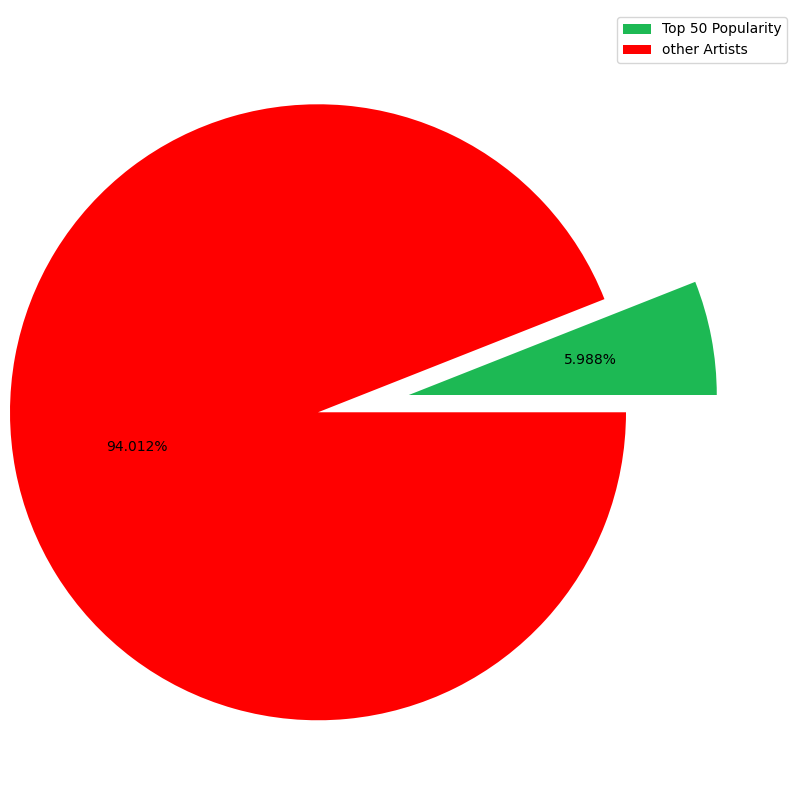

In [32]:
# Concatenating the two arrays
# Plotting pie chart
plt.figure(figsize=(10,10))
plt.pie([len(Top_50_Popularity),len(all_artist)-len(Top_50_Popularity)], autopct='%1.3f%%',explode=[0,0.3],colors=['#1DB954','red'])
plt.legend(['Top 50 Popularity', 'other Artists'])
plt.show()

**Top 50 have popularity and other**

<h2>Top 20 Artists with the popularity<h2>

In [33]:
artist_Popularity = df.groupby('Artist')['Popularity'].sum().reset_index().sort_values(by='Popularity',ascending = False).head(20)
artist_Popularity

,Artist,Popularity
628,Rihanna,1662
239,Eminem,1519
219,Drake,1424
127,Calvin Harris,1356
118,Britney Spears,1198
196,David Guetta,1185
719,Taylor Swift,1125
391,Katy Perry,1033
90,Beyoncé,1030
156,Chris Brown,1012


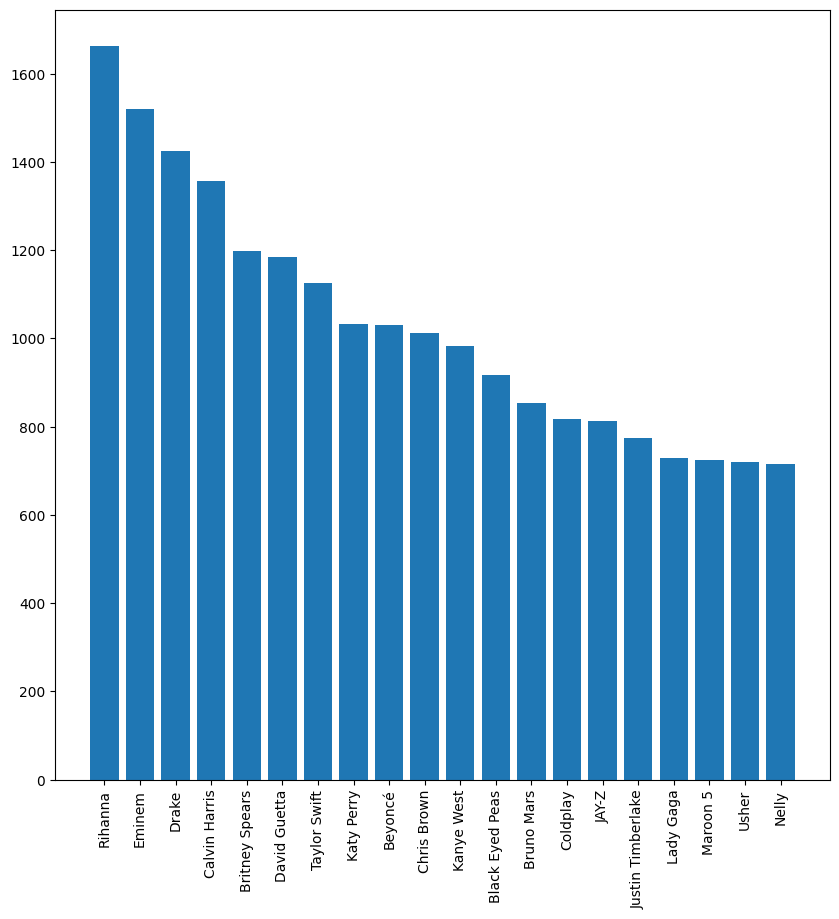

In [34]:
xticks = artist_Popularity['Artist']
plt.figure(figsize=(10,10))
plt.bar(artist_Popularity['Artist'],artist_Popularity['Popularity'])
plt.xticks(xticks, xticks,rotation=90)
plt.show()

<h3>Distributions for Popularity , Danceability, Energy, Speechiness, Tempo, Instrumentalness, Liveness,Valence, and Acousticness<h3>

In [35]:
df.columns

Index(['Artist', 'Track', 'Duration_MS', 'Explicit', 'Year', 'Popularity',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Genre'],
      dtype='object')

In [36]:
histogram_labels = ['Popularity',
                    'Danceability', 
                    'Energy', 
                    'Speechiness', 
                    'Loudness', 
                    'Acousticness', 
                    'Liveness', 
                    'Instrumentalness',
                    'Valence',
                    'Tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

**distribution For columns**  

<h2>genres of music<h2>

In [37]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [38]:
genre = df['Genre'].value_counts().reset_index()
genre

,Genre,count
0,pop,416
1,"hip hop, pop",267
2,"hip hop, pop, R&B",236
3,"pop, Dance/Electronic",216
4,"pop, R&B",172
5,hip hop,121
6,"hip hop, pop, Dance/Electronic",75
7,rock,57
8,Dance/Electronic,41
9,"rock, pop",39


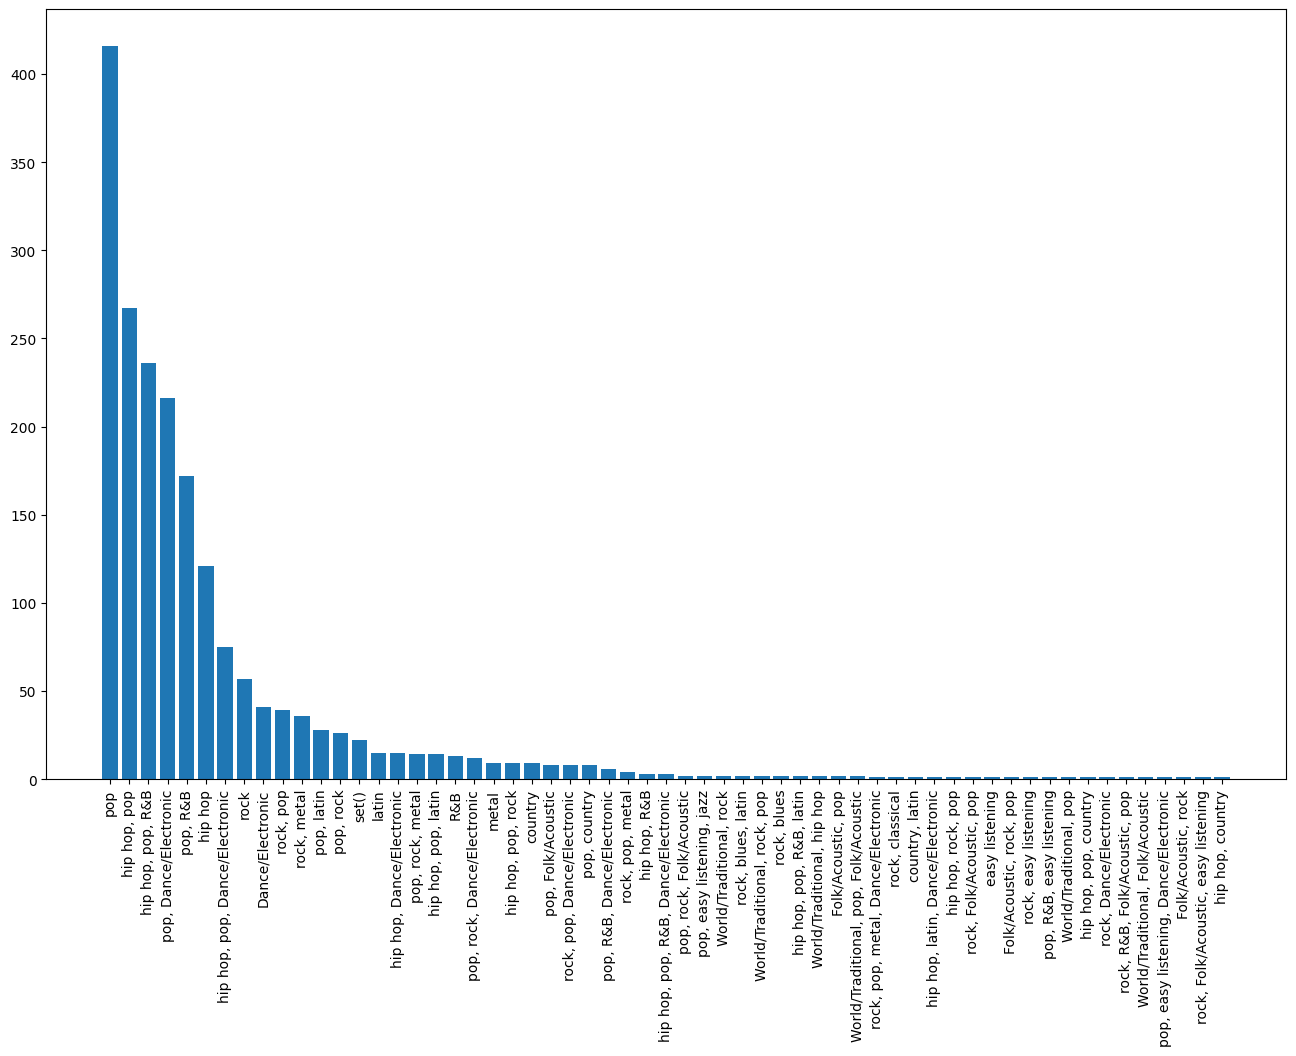

In [39]:
xticks = genre['Genre']
plt.figure(figsize=(16,10))
plt.bar(genre['Genre'],genre['count'])
plt.xticks(xticks, xticks,rotation=90)
plt.show()

**The number of type for every type of tracks**

<h2>Top Genre of music with other<h2>

In [40]:
Top_Genre = genre.groupby('Genre')['count'].sum().reset_index().sort_values(by='count',ascending = False).head(10)
Top_Genre

,Genre,count
30,pop,416
19,"hip hop, pop",267
21,"hip hop, pop, R&B",236
31,"pop, Dance/Electronic",216
33,"pop, R&B",172
14,hip hop,121
20,"hip hop, pop, Dance/Electronic",75
44,rock,57
0,Dance/Electronic,41
54,"rock, pop",39


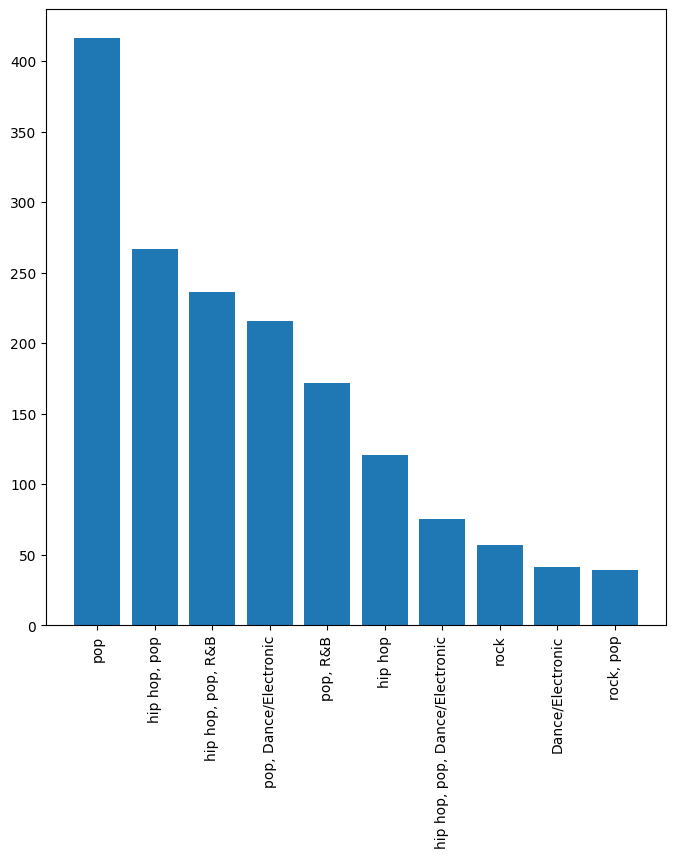

In [41]:
xticks = Top_Genre['Genre']
plt.figure(figsize=(8,8))
plt.bar(Top_Genre['Genre'],Top_Genre['count'])
plt.xticks(xticks, xticks,rotation=90)
plt.show()

<h2>all genre with the top 10<h2>

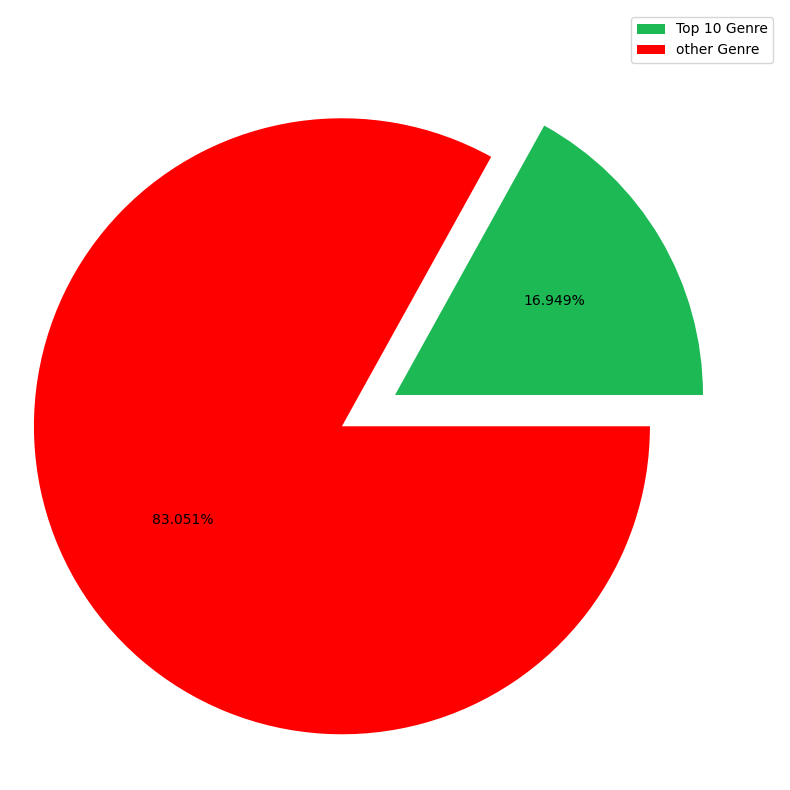

In [42]:
plt.figure(figsize=(10,10))
plt.pie([len(Top_Genre),len(genre) - len(Top_Genre)], autopct='%1.3f%%',explode=[0,0.2],colors=['#1DB954','red'])
plt.legend(['Top 10 Genre', 'other Genre'])
plt.show()

<h2>Duration<h2>

In [43]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [44]:
df['Duration_MIN'] = df['Duration_MS'] / 60000

**First convert time to minutes to make easy to deal in another column**

In [45]:
df.head()

,Artist,Track,Duration_MS,Explicit,Year,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Duration_MIN
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4.175767
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667


In [46]:
Duration_MIN = df.groupby('Year')['Duration_MIN'].sum().reset_index()
Duration_MIN

,Year,Duration_MIN
0,1998,3.591100
1,1999,160.476933
2,2000,296.959017
3,2001,429.073017
4,2002,361.116333
5,2003,358.881917
6,2004,370.029317
7,2005,399.534567
8,2006,369.097867
9,2007,348.233100


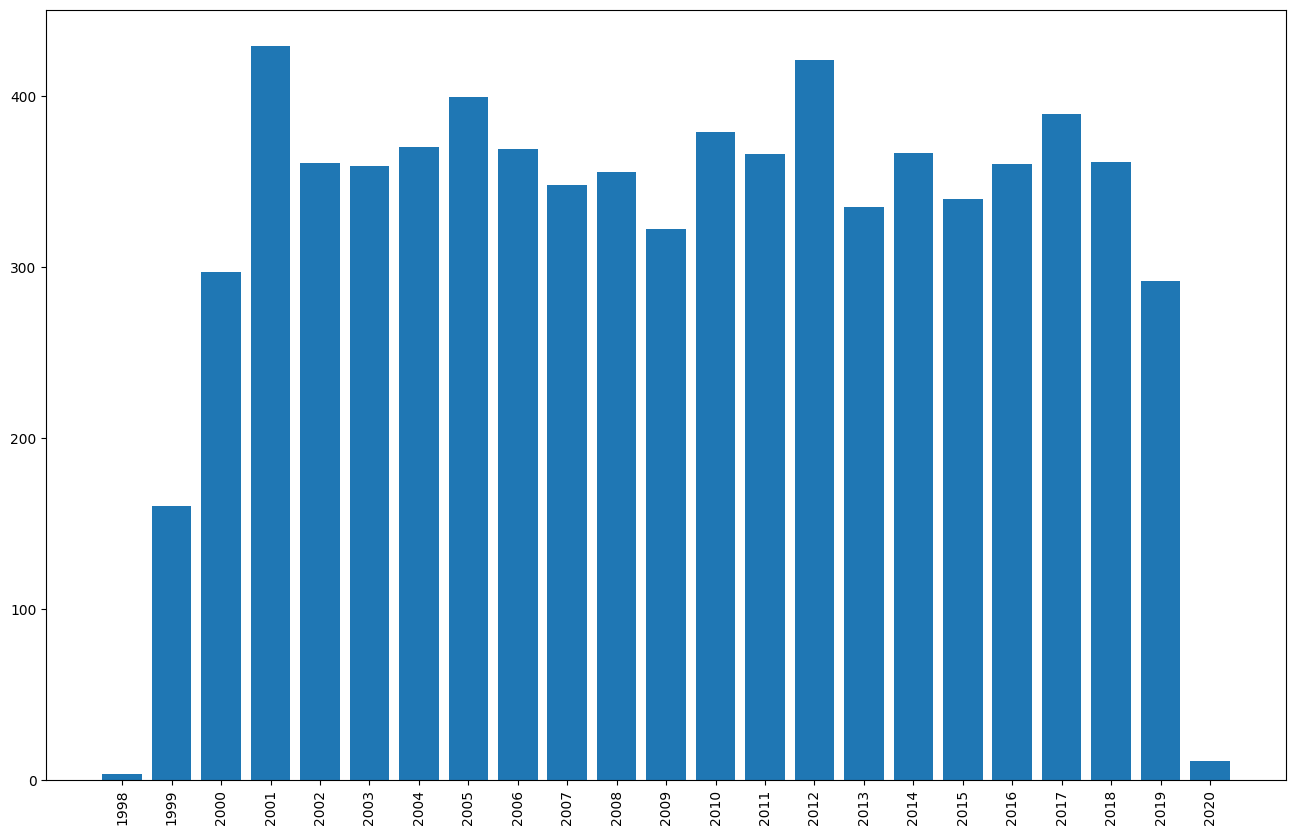

In [47]:
xticks = Duration_MIN['Year']
plt.figure(figsize=(16,10))
plt.bar(Duration_MIN['Year'],Duration_MIN['Duration_MIN'])
plt.xticks(xticks, xticks,rotation=90)
plt.show()

**The Duration of tracks are make every year**